# Main Function

Need to do the following in terminal to run:
mkdir tmp
mkdir tmp/ppo
mkdir plots


In [8]:
import gym
import torch
import numpy as np
from ipynb.fs.full.CartPolePPO import Agent
from utils import plot_learning_curve

... loading models ...
... saving models ...
episode 0 score 218.0 avg score 218.0 time_steps 218 learning_steps 10
episode 1 score 199.0 avg score 208.5 time_steps 417 learning_steps 20
episode 2 score 188.0 avg score 201.7 time_steps 605 learning_steps 30
episode 3 score 145.0 avg score 187.5 time_steps 750 learning_steps 37
episode 4 score 190.0 avg score 188.0 time_steps 940 learning_steps 47
episode 5 score 191.0 avg score 188.5 time_steps 1131 learning_steps 56
episode 6 score 218.0 avg score 192.7 time_steps 1349 learning_steps 67
episode 7 score 240.0 avg score 198.6 time_steps 1589 learning_steps 79
episode 8 score 339.0 avg score 214.2 time_steps 1928 learning_steps 96
... saving models ...
episode 9 score 375.0 avg score 230.3 time_steps 2303 learning_steps 115
... saving models ...
episode 10 score 500.0 avg score 254.8 time_steps 2803 learning_steps 140
episode 11 score 210.0 avg score 251.1 time_steps 3013 learning_steps 150
... saving models ...
episode 12 score 305.0 av

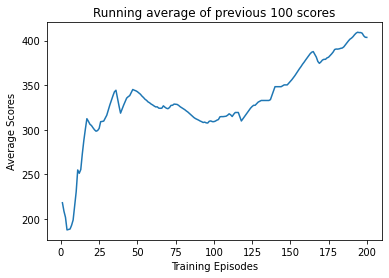

In [11]:
if __name__ == '__main__':
    env = gym.make('CartPole-v1')
    N = 20
    batch_size = 5
    n_epochs = 4
    alpha = 0.0003

    agent = Agent(num_actions = env.action_space.n, batch_size = 5, alpha = 0.0003, num_epochs = 4, input_dims = env.observation_space.shape)
    n_games = 200

    figure_file = 'plots/CartPole.png'

    best_score = env.reward_range[0]
    score_history = []

    learn_iters = 0
    avg_score = 0
    n_steps = 0

    agent.load_models()

    for i in range(n_games): # 103 min 8.8 sec for 300 iterations
        observation = env.reset()
        # observation = prepro(observation)
        done = False
        score = 0
        while not done:
            action, prob, val = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            n_steps += 1
            score += reward
            agent.remember(observation, action, prob, val, reward, done)
            if n_steps % N == 0: # if true, it's time to perform learning function
                agent.learn()
                learn_iters += 1
            observation = observation_
        score_history.append(score)
        avg_score = np.mean(score_history[-100:])

        if avg_score > best_score: # if best score found
            best_score = avg_score
            agent.save_models()

        print('episode', i, 'score %.1f' % score, 'avg score %.1f' % avg_score,
                'time_steps', n_steps, 'learning_steps', learn_iters)
    x = [i+1 for i in range(len(score_history))]
    plot_learning_curve(x, score_history, figure_file, "Training Episodes", "Average Scores")


# Save Trained Model

In [4]:
# agent.save_models()

... saving models ...


# Load Trained Model and Run Iteration

In [ ]:
# Load model
agent.load_models()

In [4]:
env = gym.make('CartPole-v1')
env.reset()
score = 0
done = False
n_steps = 0
while not done:
    env.render()
    action, prob, val = agent.choose_action(observation)
    observation_, reward, done, info = env.step(action)
    n_steps += 1
    score += reward
    agent.remember(observation, action, prob, val, reward, done)
    if n_steps % N == 0: # if true, it's time to perform learning function
        agent.learn()
        learn_iters += 1
    observation = observation_
print(score)
env.close()


79.0
